In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

datagen = ImageDataGenerator(
    rescale=1. /255,
    rotation_range = 30,
    width_shift_range=0.15,
    height_shift_range=0.15
)

datagen_test = ImageDataGenerator(rescale = 1. /255)

data_gen_entrenamiento = datagen.flow_from_directory(
    '/content/drive/MyDrive/GestionProyectos/dataset/train', 
    target_size=(48,48),
    batch_size=64,
    shuffle=True, 
    color_mode='grayscale',
    class_mode='categorical'
    )

data_gen_pruebas = datagen_test.flow_from_directory(
    '/content/drive/MyDrive/GestionProyectos/dataset/test',
    target_size=(48,48), 
    batch_size=64, 
    color_mode='grayscale',
    class_mode='categorical'
    )

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(7, activation='softmax'),
])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(data_gen_entrenamiento, epochs=100, batch_size=32, validation_data=data_gen_pruebas)

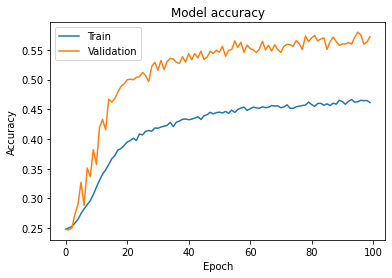

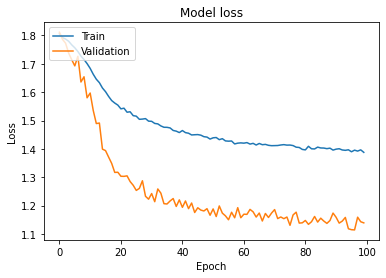

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()